In [6]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import data

In [57]:
import pickle

def upload_data(N: int, B_exp: int):
    folder_name = f"../experiments/pareto_income_data/data/N_{N}/B_exp_{B_exp}"
    output = {}
    # import data
    with open(f'{folder_name}/pareto_data.pkl', 'rb') as f:
        data = pickle.load(f)
    output["data"] = data

    # import bins
    with open(f'{folder_name}/pareto_bins.pkl', 'rb') as f:
        bins = pickle.load(f)
    output["bins"] = bins

    # import intervals
    with open(f'{folder_name}/pareto_intervals.pkl', 'rb') as f:
        intervals = pickle.load(f)
    output["intervals"] = intervals

    # import median
    with open(f'{folder_name}/pareto_median.pkl', 'rb') as f:
        median = pickle.load(f)
    output["median"] = median

    # import median quantile
    with open(f'{folder_name}/pareto_median_quantile.pkl', 'rb') as f:
        median_quantile = pickle.load(f)
    output["median_quantile"] = median_quantile

    # import cdf
    with open(f'{folder_name}/pareto_cdf.pkl', 'rb') as f:
        cf_dict = pickle.load(f)
    output["cf_dict"] = cf_dict

    return output


N = 5000
B_exp = 9
data_dict = upload_data(N, B_exp)

dict_keys(['data', 'bins', 'intervals', 'median', 'median_quantile', 'cf_dict'])

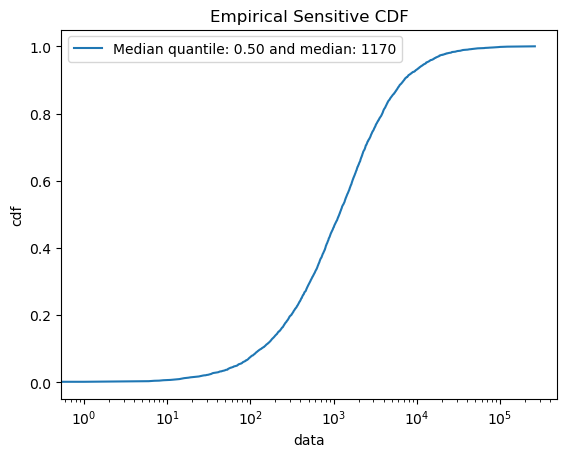

In [64]:
# print cdf of the data
import numpy as np
import matplotlib.pyplot as plt

cdf = data_dict["cf_dict"]
median = data_dict["median"]
median_quantile = data_dict["median_quantile"]
x = np.array(list(cdf.keys()))
y = np.array(list(cdf.values()))
plt.plot(x, y, label=f"Median quantile: {median_quantile:.2f} and median: {median}")
plt.xlabel("data")
plt.xscale("log")
plt.ylabel("cdf")
plt.title("Empirical Sensitive CDF")
plt.legend()
plt.show()

# Mechanism

In [65]:
from naive_noisy_binary_search.mechanism import naive_noisy_binary_search
import time

target = 0.5
eps = 0.5
replacement = False

start = time.time()
dp_median = naive_noisy_binary_search(data=data_dict["data"],
                                      coins=data_dict["bins"],
                                      target=target,
                                      eps=eps,
                                      replacement=replacement,
                                      test=True)
print(f"Time taken: {time.time() - start:.2f} seconds")

Time taken: 0.00 seconds


# Error

In [66]:
dp_median_quantile = None
dp_median_quantile = cdf[dp_median]
error = abs(dp_median_quantile - median_quantile)

In [67]:
print("True median:", median)
print("DP median:", dp_median)
print("Error:", error)

True median: 1170
DP median: 1259
Error: 0.021399999999999975
